Diabetes - Group Project Proposal

By: Nikki De Chavez, Maddie Lilly, Vincent Wang, Zhitong Zou

In [37]:
# Packages
library(tidyverse)
library(tidymodels)

Introduction:

Diabetes mellitus (commonly known as diabetes) is a metabolic disease wherein glucose metabolism is uncontrolled as a result of an individual’s insufficient insulin activity (“Diabetes,” 2018). Insulin is a hormone produced by the beta cells of the pancreas that regulates many metabolic pathways, one of which is the glucose metabolic pathways that helps to manage blood sugar levels (Kelley, 2000).

When food is eaten, glucose from the food enters the blood, increasing blood glucose concentrations (National Institute of Diabetes and Digestive and Kidney Diseases [NIDDK], 2016). High blood glucose levels cause insulin production, helping glucose to be transported to various cells of the body as a source of energy and allowing for normal blood glucose levels to be maintained (NIDDK, 2016). Insufficient insulin activity results in high blood glucose levels (hyperglycaemia) which is one of the major symptoms of diabetes mellitus (Watkins, 1982).

There are many types of diabetes, such as type 1 diabetes, type 2 diabetes, and gestational diabetes (Egan & Dinneen, 2022). Because of the limitations of the dataset, however, this project will only try to predict whether a patient does or does not have diabetes without specifying the type. Knowing whether a person is diabetic or not is important because it can result in strokes, heart and/or kidney diseases, eye problems, nerve damage, and many more (NIDDK, 2016).

The question we would like to answer is:  Can we use the observations taken by the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) to predict whether a female patient has diabetes or not?

To answer this question, the dataset that will be used is originally from the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) which conducts research on many chronic diseases to find its causes and effects (NIDDK, 2016).

Where we found the dataset: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

The NIDDK conducted this research using the diagnostic records of female patients, all of whom are at least 21 years old and of Pima Indian heritage (2016).
There are 9 variables in the dataset, which are:

1. Pregnancies: Number of times pregnant 
2. Glucose: Plasma glucose concentration after 2 hours (determined using an oral glucose tolerance test)
3. BloodPressure: Diastolic blood pressure (mm Hg) 
4. SkinThickness: Triceps skin fold thickness (mm) 
5. Insulin: 2-Hour serum insulin (mu U/ml) 
6. BMI: Body mass index (weight in kg/(height in m)^2) 
7. DiabetesPedigreeFunction: Diabetes pedigree function 
8. Age: Age (years) 
9. Outcome: Class variable (0 or 1)

Note: 0 is interpreted as not having diabetes, while 1 is interpreted as having diabetes

Premiliniary Exploratory Data Analysis

In [38]:
# The code which shows that the dataset can be read from the web into R
# Also, since we are trying to predict whether a patient has diabetes or not, the mutate() function is used to muatte the Outcome column such that it is a factor variable 

diabetes <- read_csv("diabetes.csv") |>
    mutate(Outcome = as_factor(Outcome))
diabetes

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


In [39]:
set.seed(34521)

diabetes_split <- initial_split(diabetes, prop = .75, strata = Outcome)
diabetes_test <- testing(diabetes_split)
diabetes_train <- training(diabetes_split)


missing_gluc <- nrow(filter(diabetes_train, Glucose == 0))
missing_ins <- nrow(filter(diabetes_train, Insulin == 0))
missing_bp <- nrow(filter(diabetes_train, BloodPressure == 0))
missing_skin <- nrow(filter(diabetes_train, SkinThickness == 0))
missing_BMI <- nrow(filter(diabetes_train, BMI == 0))
missing_age <- nrow(filter(diabetes_train, Age == 0))
missing_DPF <- nrow(filter(diabetes_train, DiabetesPedigreeFunction == 0))
Variable <- c("Glucose","BloodPressure","SkinThickness","Insulin","BMI", "DiabetesPedigreeFunction","Age")
TimesMissing <- c(missing_gluc,missing_bp,missing_skin, missing_ins,missing_BMI,missing_DPF, missing_age)
MissingVariablesDF <- data.frame(Variable, TimesMissing)
MissingVariablesDF

Variable,TimesMissing
<chr>,<int>
Glucose,3
BloodPressure,25
SkinThickness,161
Insulin,271
BMI,7
DiabetesPedigreeFunction,0
Age,0


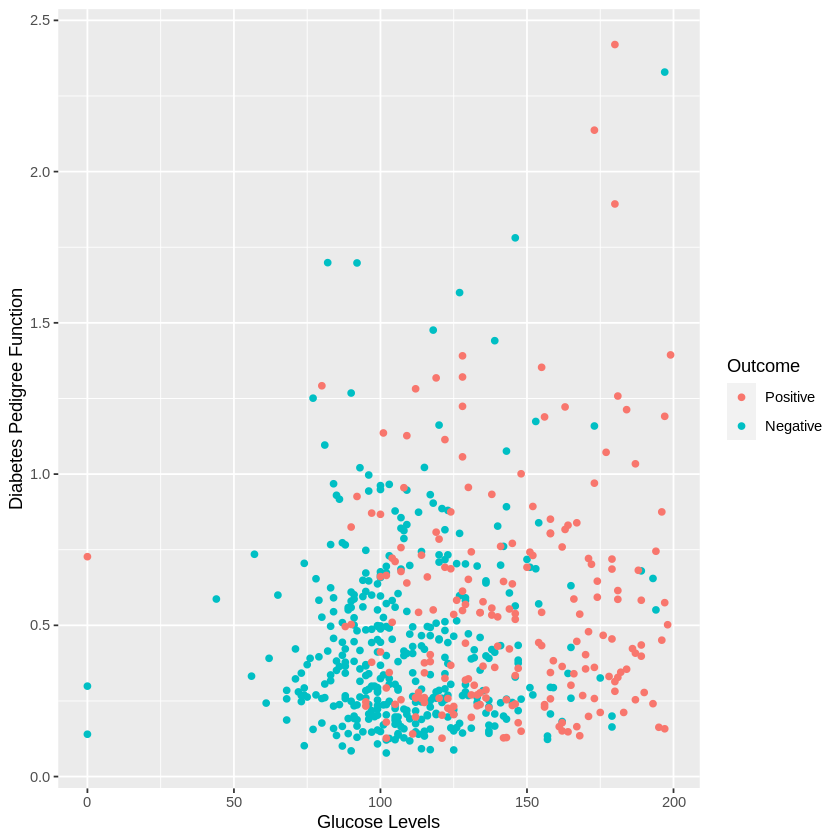

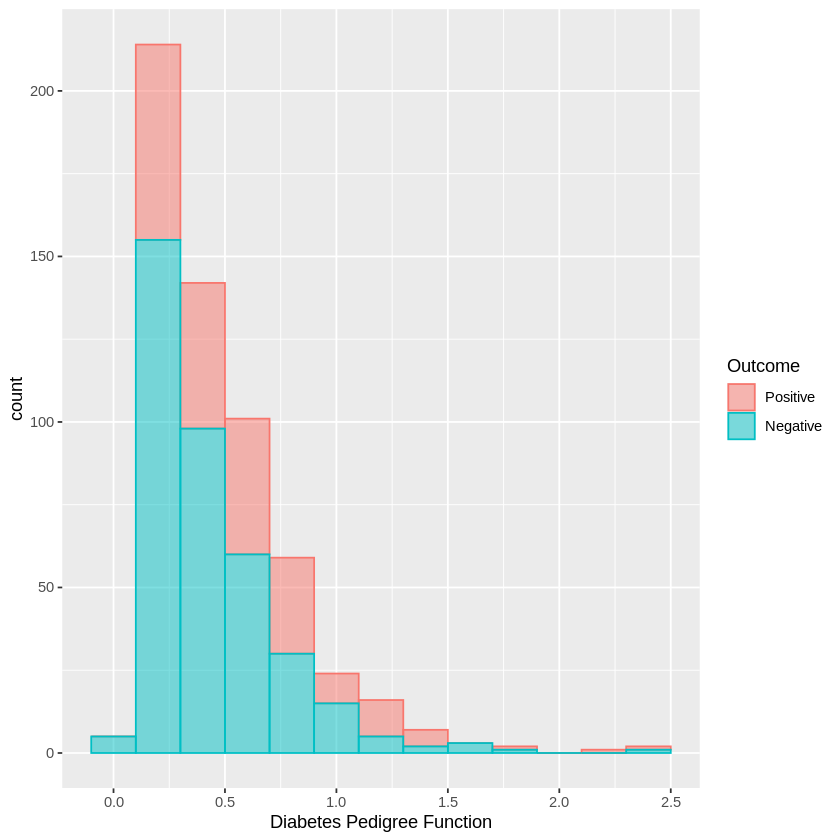

In [40]:

 
diabetes_train$Outcome <- factor(diabetes_train$Outcome, levels=c("1", "0"), labels = c("Positive", "Negative")) 
diabetes_bmi<- ggplot(diabetes_train, aes(x = Glucose, y = DiabetesPedigreeFunction)) +
  geom_point(aes(colour = Outcome)) +
 labs(x = "Glucose Levels", y = "Diabetes Pedigree Function", colour = "Outcome")
diabetes_bmi

diabetes_bmi<- ggplot(diabetes_train, aes(x = DiabetesPedigreeFunction, colour = Outcome, fill = Outcome)) +
  geom_histogram(, position="stack", binwidth=.2, alpha = .5)+
 labs(x = "Diabetes Pedigree Function", colour = "Outcome")

diabetes_bmi

